In [40]:
import json
import time
import warnings
from qiskit import transpile
from qiskit.quantum_info import Pauli
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN

from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import Operator
from scipy.linalg import expm

In [41]:
algorithm_globals.random_seed = 42

def ansatz(num_qubits):
    return RealAmplitudes(num_qubits, reps=5)

num_qubits = 5
circ = ansatz(num_qubits)
circ.decompose().draw(output="mpl", style="clifford")


# simulator_basic = BasicSimulator()

s=[ 2.01427763,  2.40936016,  0.2146867 ,  0.99036023,  2.03046934,
        0.04110537,  0.55103087,  0.94937206,  0.48027035,  0.32889186,
        1.55885499,  0.35718271,  1.95675327,  0.03545981,  0.39603375,
        1.23112602,  0.11953064,  0.15558295, -0.14841162, -0.09632555,
       -0.3000918 ,  0.20777151,  0.66830925,  1.61232516]


def auto_encoder_circuit(num_latent, num_trash):
    qr = QuantumRegister(num_latent + num_trash, "q")
    circuit = QuantumCircuit(qr)

    # pauli_op=SparsePauliOp.from_list([('Z'*(num_latent+num_trash), 1.0)])
    # pauli_list = [('IIII', 0.5),('ZZZZ', 0.5)]
    
    # paulis = []
    # coeffs = []

    # for term in pauli_list:
    #     pauli_str, coeff = term
    #     paulis.append(Pauli(pauli_str))
    #     coeffs.append(coeff)
    
    # sparse_pauli_op = SparsePauliOp(paulis, coeffs)

    # print(SparsePauliOp.from_list([('IIII', 0.5)]))
    
    # print(sparse_pauli_op)
    operator = SparsePauliOp.from_sparse_list([("", [], -0.8105479805373275),
                                                ("Z", [0], 0.17218393261915543), 
                                                ("Z", [1], -0.22575349222402363), 
                                                ("Z", [2], 0.1721839326191554), 
                                                ("Z", [3], -0.22575349222402366), 
                                                ("ZZ", [0,1], 0.12091263261776627), 
                                                ("ZZ", [0,2], 0.16892753870087907), 
                                                ("YYYY", [0,1,2,3], 0.04523279994605783),
                                                ("XXYY", [0,1,2,3], 0.04523279994605783), 
                                                ("YYXX", [0,1,2,3], 0.04523279994605783), 
                                                ("XXXX", [0,1,2,3], 0.04523279994605783), 
                                                ("ZZ", [0,3], 0.16614543256382414), 
                                                ("ZZ", [1,2], 0.16614543256382414), 
                                                ("ZZ", [1,3], 0.1746434306830041), 
                                                ("ZZ", [2,3], 0.12091263261776627)], num_qubits = 4)
    
    unitary_op = operator.to_matrix()
    #print(f"Unitary Operator: {unitary_op}")
    #unitary_matrix = unitary_op.to_matrix()
    unitary_matrix = expm(-1j * unitary_op)
    # print(f"Unitary Matrix:{unitary_matrix}")
    circuit.unitary(unitary_matrix,qubits=list(range(num_latent+num_trash)))
    # print(repr(operator))
    circuit.compose(ansatz(num_latent + num_trash), range(0, num_latent + num_trash), inplace=True)
    circuit.draw(output='mpl')
    return circuit

num_latent = 4
num_trash = 0
circuit = auto_encoder_circuit(num_latent, num_trash)

circuit.num_parameters
a = circuit.assign_parameters(s,inplace=False)

# circOp = Operator.from_circuit(a)

## After compression

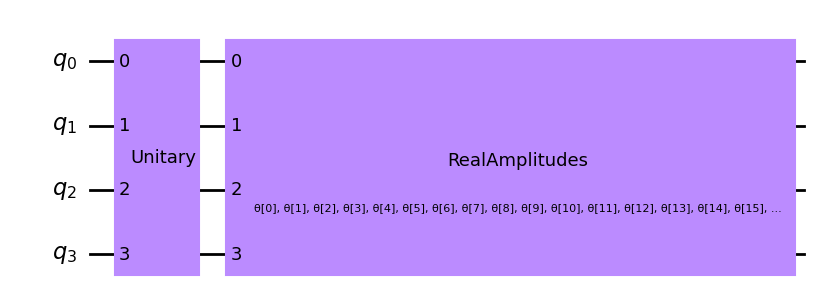

In [42]:
circuit.draw(output="mpl", style="clifford")

## Operator

In [43]:
circOp.draw("latex")

<IPython.core.display.Latex object>

## matrix form

In [44]:
circOp.to_matrix()

array([[-2.30617142e-02+6.40091153e-19j,  2.90762381e-03+8.93968079e-03j,
         1.08147815e-01+5.51936088e-02j, -4.99085031e-03-1.47528371e-02j,
         4.96676013e-02+1.52706309e-01j,  1.06224804e-01-1.97893744e-01j,
        -1.05696120e-01-2.71629678e-01j,  2.02665012e-01+4.66082048e-01j,
         4.49125616e-02+2.29212800e-02j,  5.87819555e-02+2.14563676e-01j,
         3.93190199e-01+1.14893283e-01j, -4.76555877e-01-1.75754402e-01j,
         4.76937210e-02+1.40981527e-01j, -2.59209242e-02-5.96120530e-02j,
        -2.06634523e-01-7.62070702e-02j,  1.07894096e-01-2.34798217e-02j],
       [ 1.91412311e-01-5.31275886e-18j,  8.83986035e-02+2.71787325e-01j,
         3.23082277e-01+1.64886149e-01j, -4.98216766e-02-1.47271714e-01j,
        -5.41698279e-02-1.66548701e-01j,  5.24854739e-02-1.56670767e-01j,
         4.20209885e-02+1.09351467e-01j, -1.02854775e-01-2.36541887e-01j,
         4.12694559e-01+2.10620084e-01j, -2.49346199e-02-8.85677496e-02j,
         4.76388862e-02+2.98307602e-0